# MVP Análise de Dados e Boas Práticas

**Nome:** Aldenir Veibes Laurentino de Lima

**Matrícula:** 4052025000172

**Dataset:** [Wine Quality Dataset](https://archive.ics.uci.edu/dataset/186/wine+quality)

# Descrição do Problema

Prever a qualidade do vinho (nota de 0 a 10) com base em atributos físico-químicos da bebida, como acidez, teor alcoólico, açúcar residual, pH e dióxido de enxofre.

#Contexto dos Dados:
Origem: Vinho Verde (Vinho Verde DOC) produzido no norte de Portugal.

Tipos:

Red (tinto): **1.599 amostras**

White (branco): **4.898 amostras**

Cada linha representa uma amostra de vinho, com 11 atributos contínuos e uma nota de qualidade atribuída por degustadores.

## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

- Qual atributo químico tem mais impacto na qualidade do vinho?

- É possível prever se um vinho será bom com base apenas na acidez e no álcool?

- Vinhos brancos tendem a ter notas mais altas que vinhos tintos?



## Tipo de Problema
O problema pode ser tratado como:

**Regressão:** Prever a nota exata de qualidade (0–10).

**Classificação:** Categorizar vinhos como "ruins", "médios" ou "bons" a partir da nota de qualidade. Por exemplo:

3–4 = ruim

5–6 = médio

7+ = bom

## Seleção de Dados

O dataset Wine Quality não necessita fazer seleção de dados externa para começar a trabalhar, pois ela já vem:

- Limpa
- Sem valores ausentes (missing values)
- Com colunas bem definidas e rotuladas
- Pronta para análise e modelagem

## Atributos do Dataset

| Atributo               | Tipo     | Descrição                         |
| ---------------------- | -------- | --------------------------------- |
| `fixed acidity`        | Numérico | Ácido tartárico (g/dm³)           |
| `volatile acidity`     | Numérico | Ácido acético (vinagre) (g/dm³)   |
| `citric acid`          | Numérico | Ácido cítrico (g/dm³)             |
| `residual sugar`       | Numérico | Açúcares residuais (g/dm³)        |
| `chlorides`            | Numérico | Cloretos (g/dm³)                  |
| `free sulfur dioxide`  | Numérico | SO₂ livre (mg/dm³)                |
| `total sulfur dioxide` | Numérico | SO₂ total (mg/dm³)                |
| `density`              | Numérico | Densidade (g/cm³)                 |
| `pH`                   | Numérico | Acidez (sem unidade)              |
| `sulphates`            | Numérico | Sulfatos (g/dm³)                  |
| `alcohol`              | Numérico | Teor alcoólico (% vol)            |
| `quality`              | Inteiro  | Nota sensorial atribuída (0 a 10) |

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset Wine Quality.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# URLs do dataset de vinho tinto e branco
url_red = 'https://raw.githubusercontent.com/veiberlim/wine-quality-analysis/refs/heads/main/winequality-red.csv'
url_white = 'https://raw.githubusercontent.com/veiberlim/wine-quality-analysis/refs/heads/main/winequality-white.csv'

In [2]:
# carregamento do dataset (aqui, ele fica disponível nesse método)
df_red = pd.read_csv(url_red, sep=';')
df_white = pd.read_csv(url_white, sep=';')

In [3]:
# Adiciona a coluna que indica o tipo do vinho
df_red['type'] = 'red'
df_white['type'] = 'white'

In [4]:
# Junta os dois dataframes
df = pd.concat([df_red, df_white], ignore_index=True)

In [5]:
# primeiras linhas
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


# Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset Wine Quality, visamos entender a distribuição, as relações e as características das variáveis físico-químicas, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

## Total e Tipo das Instâncias

O dataset Wine Quality possui 6.497 instâncias (observações), sendo 1.599 de vinhos tintos e 4.898 de vinhos brancos. Todas as variáveis físico-químicas são numéricas (float), e o atributo 'type' é categórico (indica o tipo de vinho).

In [6]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 6497

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None


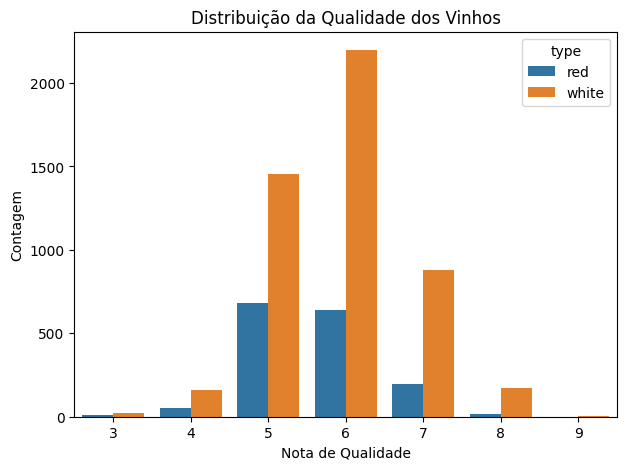

In [7]:
# Gráfico de distribuição da variável alvo (quality)
plt.figure(figsize=(7, 5))
sns.countplot(x='quality', data=df, hue='type')
plt.title('Distribuição da Qualidade dos Vinhos')
plt.xlabel('Nota de Qualidade')
plt.ylabel('Contagem')
plt.show()

 O gráfico de barras acima mostra como as amostras estão distribuídas em relação à nota de qualidade atribuída, separando visualmente os tipos de vinho (tinto e branco). Observamos que a maioria dos vinhos recebe nota 5 ou 6, indicando uma tendência à qualidade intermediária. Os vinhos brancos, por serem maioria, aparecem mais em quase todas as categorias. Poucas amostras têm notas extremas como 3 ou 8, evidenciando um leve desbalanceamento no conjunto.

## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [8]:
# estatísticas descritivas básicas do dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [9]:
# média dos atributos numéricos do dataset
df.describe().loc['mean']

,mean
fixed acidity,7.215307
volatile acidity,0.339666
citric acid,0.318633
residual sugar,5.443235
chlorides,0.056034
free sulfur dioxide,30.525319
total sulfur dioxide,115.744574
density,0.994697
pH,3.218501
sulphates,0.531268


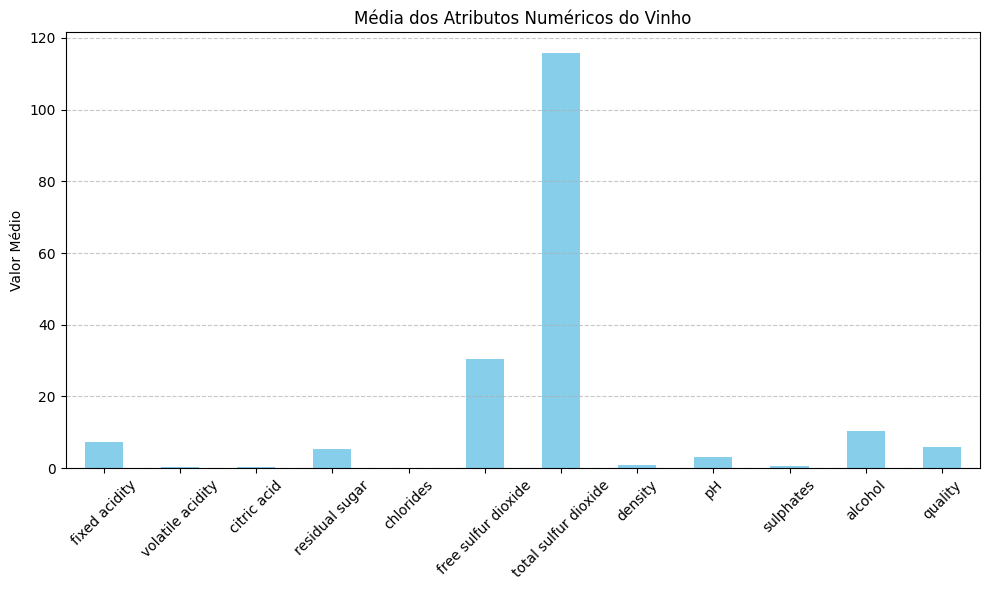

In [11]:
# Gráfico de barras das médias
plt.figure(figsize=(10, 6))
mean_values = df.describe().loc['mean']
mean_values.plot(kind='bar', color='skyblue')
plt.title('Média dos Atributos Numéricos do Vinho')
plt.ylabel('Valor Médio')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [12]:
# desvio padrão dos atributos numéricos do dataset
std_values = df.describe().loc['std']
std_values

,std
fixed acidity,1.296434
volatile acidity,0.164636
citric acid,0.145318
residual sugar,4.757804
chlorides,0.035034
free sulfur dioxide,17.749400
total sulfur dioxide,56.521855
density,0.002999
pH,0.160787
sulphates,0.148806


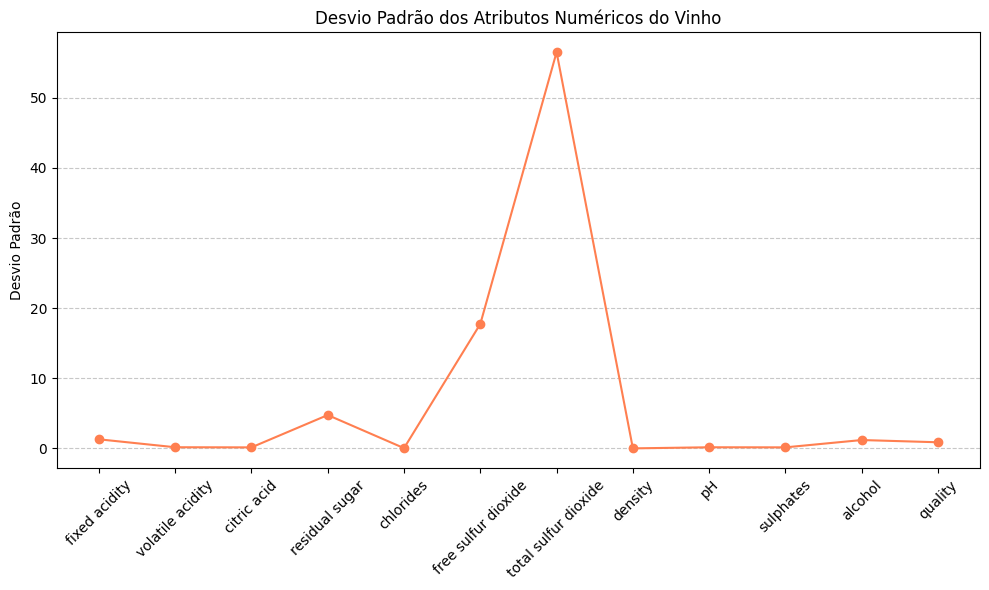

In [13]:
# Gráfico de linha para os desvios padrão
plt.figure(figsize=(10, 6))
plt.plot(std_values.index, std_values.values, marker='o', linestyle='-', color='coral')
plt.title('Desvio Padrão dos Atributos Numéricos do Vinho')
plt.ylabel('Desvio Padrão')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Histograma

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

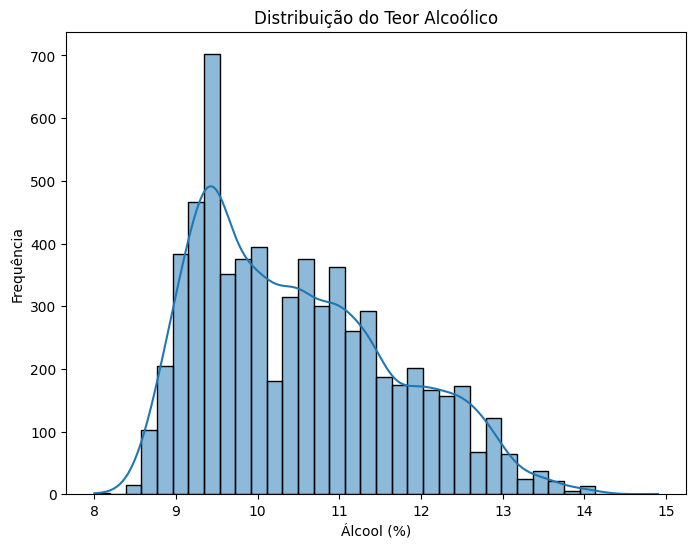

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(df['alcohol'], kde=True)
plt.title('Distribuição do Teor Alcoólico')
plt.xlabel('Álcool (%)')
plt.ylabel('Frequência')
plt.show()

### Curiosidades e fatos importantes sobre o álcool no dataset *Wine Quality*:

1. **Importância na qualidade do vinho:** O teor alcoólico é um dos fatores químicos que mais influencia a percepção de qualidade do vinho. Geralmente, vinhos com níveis moderados a altos de álcool tendem a ser avaliados com notas melhores, pois o álcool contribui para o corpo e o sabor do vinho.

2. **Faixa típica:** No dataset, o álcool varia geralmente entre cerca de 8% e 14%, o que é típico para vinhos comerciais. Valores fora dessa faixa podem indicar vinhos fora do padrão ou até erros na coleta.

3. **Distribuição assimétrica:**
O histograma costuma mostrar uma distribuição ligeiramente assimétrica, com a maior concentração de vinhos em torno de 10-12% de álcool. Isso indica que a maioria dos vinhos está nessa faixa considerada ideal.

4. **Relação com outras variáveis:** O álcool tem correlação positiva com qualidade, mas também com densidade (mais álcool geralmente significa menos densidade). Pode ser uma variável importante para modelos de predição da qualidade.

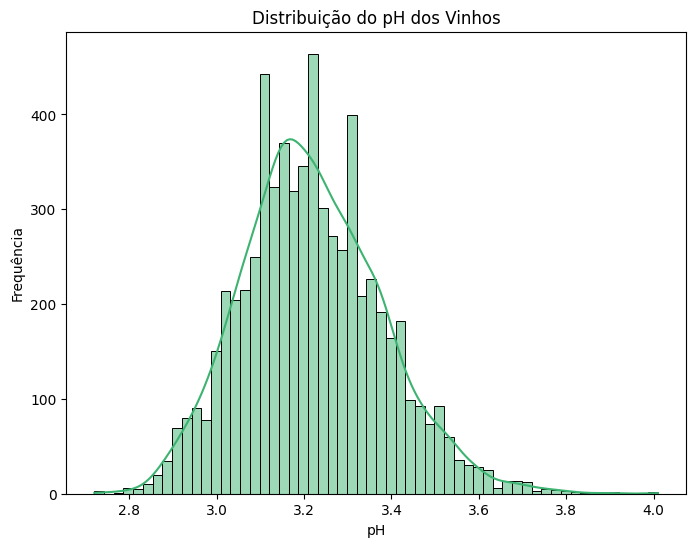

In [15]:
# Histograma do pH com KDE
plt.figure(figsize=(8, 6))
sns.histplot(df['pH'], kde=True, color='mediumseagreen')
plt.title('Distribuição do pH dos Vinhos')
plt.xlabel('pH')
plt.ylabel('Frequência')
plt.show()

### *Análise do pH:*

- O pH mede a acidez do vinho, onde valores menores indicam maior acidez.
- No dataset, o pH varia entre aproximadamente 2.7 e 4.0, faixa típica para vinhos.
- A maioria dos vinhos tem pH entre 3.0 e 3.5, indicando um equilíbrio entre acidez e suavidade.
- A acidez é importante para o sabor e conservação do vinho, afetando a percepção da qualidade.

## Boxplot

Comparamos aqui as características químicas e outras medidas entre os dois tipos de vinho.

Por exemplo, você pode ver se o teor de álcool médio é diferente em vinhos tintos e brancos, ou se o pH varia entre eles.

Ajuda a identificar diferenças importantes entre os grupos que podem influenciar a qualidade ou perfil do vinho.


In [16]:
# Estatísticas descritivas agrupadas por espécie
df.groupby('type').describe()

fixed acidity                                                \
              count      mean       std  min  25%  50%  75%   max   
type                                                                
red          1599.0  8.319637  1.741096  4.6  7.1  7.9  9.2  15.9   
white        4898.0  6.854788  0.843868  3.8  6.3  6.8  7.3  14.2   

      volatile acidity            ... alcohol       quality            \
                 count      mean  ...     75%   max   count      mean   
type                              ...                                   
red             1599.0  0.527821  ...    11.1  14.9  1599.0  5.636023   
white           4898.0  0.278241  ...    11.4  14.2  4898.0  5.877909   

                                          
            std  min  25%  50%  75%  max  
type                                      
red    0.807569  3.0  5.0  6.0  6.0  8.0  
white  0.885639  3.0  5.0  6.0  6.0  9.0  

[2 rows x 96 columns]

### *Distribuição do Alcool por tipo de vinho*


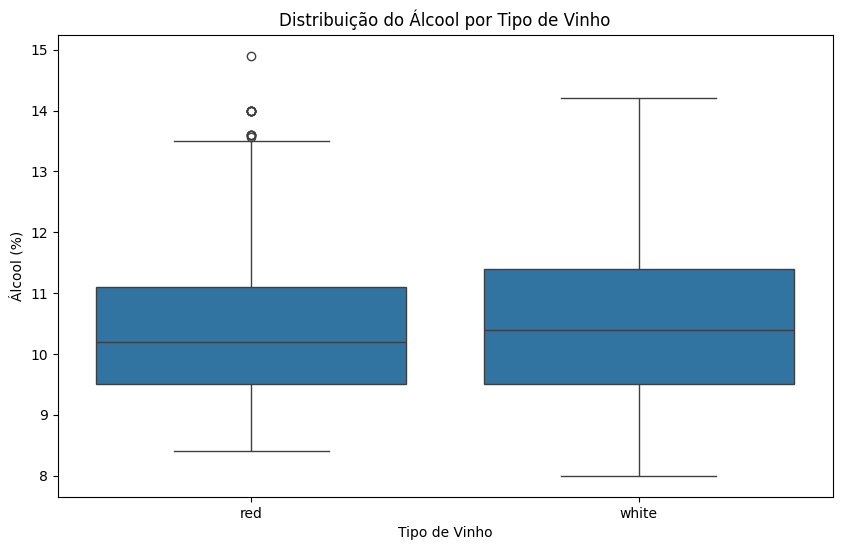

In [17]:
# Boxplot por tipo de vinho
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='alcohol', data=df)
plt.title('Distribuição do Álcool por Tipo de Vinho')
plt.xlabel('Tipo de Vinho')
plt.ylabel('Álcool (%)')
plt.show()

 O boxplot mostra que os vinhos brancos tendem a ter um teor alcoólico mais elevado do que os vinhos tintos,com uma mediana visivelmente maior. Além disso, a distribuição do álcool nos brancos é mais dispersa, enquanto os tintos apresentam uma concentração maior de valores próximos à mediana. Essa diferença pode influenciar na percepção de qualidade entre os tipos.

## Matriz de Correlação

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos das espécies podem ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

In [19]:
# Matriz de correlação
print("\nMatriz de Correlação:")
df.corr(numeric_only=True)


Matriz de Correlação:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


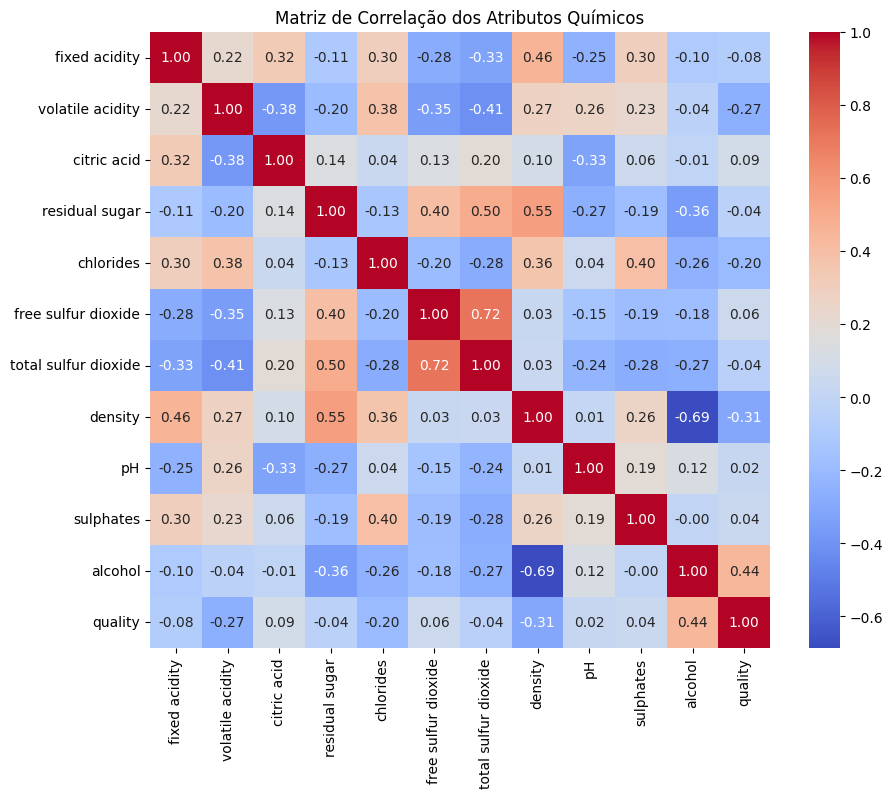

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação dos Atributos Químicos')
plt.show()

O mapa de calor da matriz de correlação revela fortes correlações positivas entre *alcohol* e *quality*, além de correlação negativa entre *density* e *alcohol*. Também observamos relações entre *citric acid*, *fixed acidity* e *pH*. Essas correlações indicam que certas combinações de atributos se comportam de maneira semelhante ou oposta, o que pode ser útil na seleção de características para modelagem preditiva.

# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [21]:
# Separar features (X) e target (y)
X = df.drop(columns=['quality', 'type'])
y = df['quality']

In [22]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")

Dimensões de X_train: (4547, 11)
Dimensões de X_test: (1950, 11)


In [24]:
scaler_norm = MinMaxScaler()
scaler_norm.fit(X_train)
X_train_normalized = scaler_norm.transform(X_train)
X_test_normalized = scaler_norm.transform(X_test)

## Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. No contexto do Wine Quality, isso é importante porque os atributos físico-químicos como *alcohol*, *density* e *citric acid* têm escalas diferentes. A normalização garante que nenhuma variável domine
o processo de aprendizado por estar em uma faixa numérica muito maior. Dessa forma, algoritmos de machine learning que são sensíveis à escala (como k-NN e redes neurais) podem aprender de forma mais justa e equilibrada.



In [25]:
# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

In [26]:
# Aprende min e max APENAS de X_train
scaler_norm.fit(X_train)
X_train_normalized = scaler_norm.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_normalized = scaler_norm.transform(X_test)

In [27]:
# Exibir as primeiras linhas dos dados normalizados (como DataFrame para melhor visualização)
df_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)

In [29]:
print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
df_normalized.head()


Primeiras 5 linhas dos dados normalizados (treino):


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.516949,0.273333,0.186992,0.027607,0.129568,0.123711,0.322485,0.148255,0.023622,0.125000,0.231405
1,0.330508,0.133333,0.284553,0.225460,0.078073,0.206186,0.328402,0.244650,0.417323,0.159091,0.264463
2,0.661017,0.263333,0.325203,0.012270,0.136213,0.034364,0.065089,0.191440,0.259843,0.244318,0.336088
3,0.330508,0.066667,0.276423,0.032209,0.094684,0.096220,0.153846,0.146327,0.496063,0.318182,0.628099
4,0.322034,0.113333,1.000000,0.061350,0.043189,0.343643,0.852071,0.059186,0.228346,0.119318,0.842975


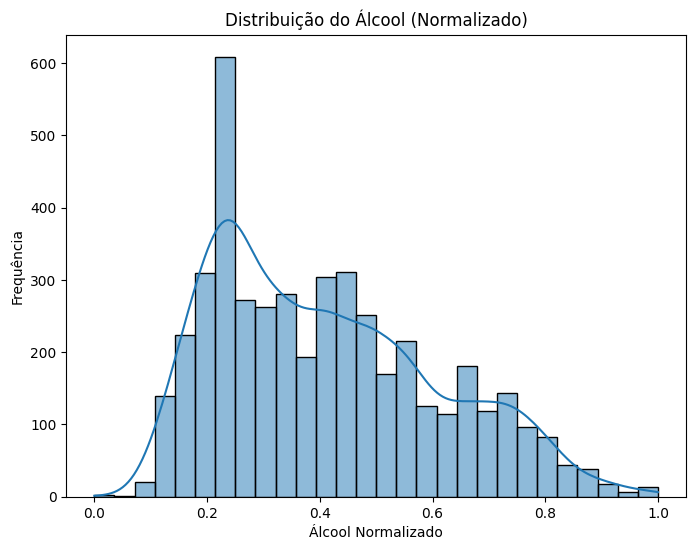

In [30]:
# Visualização da distribuição após a normalização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(df_normalized['alcohol'], kde=True)
plt.title('Distribuição do Álcool (Normalizado)')
plt.xlabel('Álcool Normalizado')
plt.ylabel('Frequência')
plt.show()

 O histograma do álcool após a normalização mostra que os valores foram escalados para o intervalo entre 0 e 1, preservando a forma geral da distribuição original. Essa transformação permite que o modelo aprenda de forma mais eficiente, evitando que variáveis com escalas maiores dominem o processo de aprendizado.

## Padronização

A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. É útil para algoritmos que são sensíveis à escala das características, como SVMs ou redes neurais.

In [31]:
# Inicializar o StandardScaler
scaler_std = StandardScaler()

In [32]:
# Aprende média e desvio padrão APENAS de X_train
scaler_std.fit(X_train)
X_train_standardized = scaler_std.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_standardized = scaler_std.transform(X_test)

In [33]:
# Exibir as primeiras linhas dos dados padronizados (como DataFrame para melhor visualização)
df_standardized = pd.DataFrame(X_train_standardized, columns=X_train.columns)

In [35]:
print("\nPrimeiras 5 linhas dos dados padronizados (treino):")
df_standardized.head()


Primeiras 5 linhas dos dados padronizados (treino):


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2.097494,0.944541,-0.619125,-0.638633,0.936331,-0.660718,-0.011208,0.041683,-2.789800,-0.607582,-0.909142
1,0.388773,-0.353028,0.206940,2.056125,0.013093,0.028397,0.024506,1.697545,0.330043,-0.199847,-0.741998
2,3.417870,0.851858,0.551134,-0.847529,1.055459,-1.407259,-1.564768,0.783509,-0.917894,0.819490,-0.379854
3,0.388773,-0.970918,0.138101,-0.575964,0.310912,-0.890423,-1.029058,0.008566,0.954012,1.702915,1.096578
4,0.311104,-0.538395,6.264754,-0.179062,-0.612326,1.176922,3.185196,-1.488334,-1.167481,-0.675538,2.183010


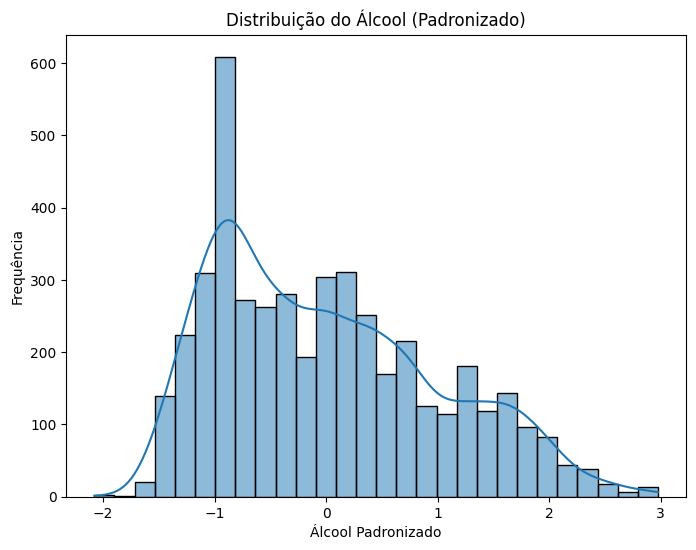

In [36]:
# Visualização da distribuição após a padronização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(df_standardized['alcohol'], kde=True)
plt.title('Distribuição do Álcool (Padronizado)')
plt.xlabel('Álcool Padronizado')
plt.ylabel('Frequência')
plt.show()

O histograma do álcool após a padronização mostra que os valores foram transformados para ter média próxima de zero e desvio padrão igual a um, centralizando a distribuição. Isso é útil especialmente para algoritmos sensíveis à escala dos dados, como SVMs e redes neurais, melhorando sua performance e estabilidade numérica.

## Tratamento de Valores Nulos

O dataset Iris original não possui valores nulos. No entanto, o tratamento de valores nulos é crucial e pode envolver imputação (preenchimento com média, mediana, moda) ou remoção de linhas/colunas.

In [58]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset Wine Quality:")
df.isnull().sum()

Valores nulos no dataset Wine Quality:


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


## Outras Transformações e Etapas de Pré-Processamento

- Seleção de características (feature selection): podemos utilizar técnicas como análise de correlação, importância de atributos via modelos de árvore (RandomForest, XGBoost) ou métodos estatísticos para reduzir o número de variáveis mantendo apenas as mais relevantes para a predição da qualidade do vinho.

- Redução de dimensionalidade: técnicas como PCA (Análise de Componentes Principais) podem ser aplicadas para comprimir a informação presente em muitas variáveis em um número menor de componentes principais, o que reduz ruído e melhora a eficiência de modelos complexos.

- Criação de novas variáveis (feature engineering): por exemplo, podemos criar um atributo derivado entre 'free sulfur dioxide' e 'total sulfur dioxide' para capturar sua proporção, que pode ser um indicativo relevante de preservação e sabor.

- Balanceamento de classes: como a variável alvo (quality) é desbalanceada — com poucas amostras para notas 3 ou 8 — podemos usar técnicas como oversampling (SMOTE) ou undersampling para equilibrar a distribuição de rótulos e melhorar a capacidade preditiva dos modelos.

- Detecção e remoção de outliers: com boxplots ou métodos como IQR ou Isolation Forests, podemos identificar amostras extremas que poderiam distorcer os modelos.

Essas etapas podem ser exploradas em estudos posteriores ou aplicadas conforme o algoritmo de machine learning utilizado.



# Conclusão

A análise e pré-processamento do dataset Wine Quality evidenciaram as principais características químicas associadas à nota de qualidade atribuída por especialistas. Os vinhos brancos tendem a ter mais observações, mas tanto eles quanto os tintos mostram padrões distintos de distribuição para atributos como teor alcoólico, sulfatos e acidez. O dataset é limpo, sem valores nulos, e pronto para modelagem. A matriz de correlação revelou fortes relações entre variáveis como 'alcohol' e 'density' ou 'sulphates'. A aplicação de normalização e padronização é importante para garantir desempenho consistente nos algoritmos de machine learning.